In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import tensorflow_hub as hub
print("GPU","available(YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not there :)")

GPU available(YESSSS!!!!!)


In [ ]:
!unzip "Drive/My Drive/dog-breed-identification_1.zip"-d "Drive/My Drive/Dog_breed"

unzip:  cannot find or open Drive/My Drive/dog-breed-identification_1.zip-d, Drive/My Drive/dog-breed-identification_1.zip-d.zip or Drive/My Drive/dog-breed-identification_1.zip-d.ZIP.


In [ ]:
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/Dog_breed/dog-breed-identification/labels.csv")
data

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
#Checking how many dogs are the in a particular breed for all the  breeds
data["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
#checking the effeciency of data i.e min every
print(data["breed"].value_counts().median())
(data["breed"].value_counts().mean())

82.0


85.18333333333334

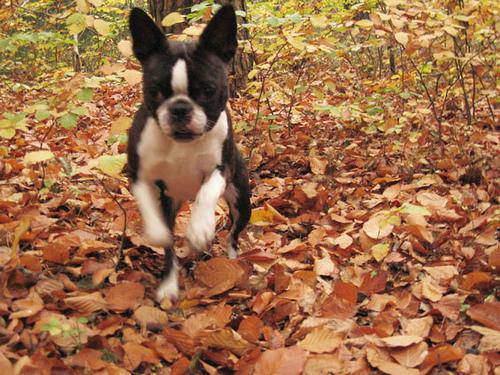

In [ ]:
#Importing images of dogs from training data and accessing them to check whther they are proper, training data have labels
from IPython.display import Image
Image ( "/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
#/content/drive/MyDrive/Dog_breed/dog-breed-identification/labels.csv

Creating Array of Image id's address so that it will be useful for handelling


In [ ]:
filenames = ["/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/"+ a + ".jpg" for a in data["id"]]
filenames

['/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identifica

In [ ]:
#Checking whether the length of array and length of original image set is same or not
len(filenames)


10222

In [ ]:
type(filenames)



list

In [ ]:
import os
len(os.listdir("/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/"))

10262

In [ ]:
from IPython.display import Image
Image(filenames[4])
#Image(filenames[30])
for i in range(5) :
  print(Image(filenames[i]))

<IPython.core.display.Image object>
<IPython.core.display.Image object>
<IPython.core.display.Image object>
<IPython.core.display.Image object>
<IPython.core.display.Image object>


In [ ]:
filenames[30]

'/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/00ca18751837cd6a22813f8e221f7819.jpg'

In [ ]:
data["breed"][3500]

'papillon'

In [ ]:
import numpy as np
breed = np.array(data["breed"])
breed

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(breed) #Crosschecking whether length of breed is equal to length of filenames(which we have created )

10222

In [ ]:
#Checking number of different type of lables to predict
unique_breeds= np.unique(breed)

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len (np.unique(breed))

120

In [ ]:
len(unique_breeds)

120

The length of unique_breeds should be 120, meaning we're working with images of 120 different breeds of dogs and our model has to identify between them and we have to train it accordingly

In [ ]:

#Turning a breed into array of boolean
print(breed[0])
breed[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

By using this we converted a particular dog breed(predicator variable) into array of boolean :

In [ ]:
from tensorflow.python.ops.gen_array_ops import unique
# Turnning every label(breed) into a boolean array
boolean_labels = [i == unique_breeds for i in breed]

boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
print(breed[0]) # original label
#len(unique_breeds)
#for j in unique_breeds :
#  for i in range(0,120) :
#   if  j[i] == breed[0]:
#     print (i)
print(np.where(unique_breeds == breed[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own valiadiation set since in kaggle they did'nt give any valiadiation set

In [ ]:
X = filenames
y = boolean_labels

In [ ]:
#Since we have 10,000 images to train , it will take lot of time to train it , so starting it with less no of image items , say 1000
x= filenames
y= boolean_labels

In [ ]:
len(x)

10222

In [ ]:
len(boolean_labels)

10222

In [ ]:
NUM_IMAGES = 1000 #@param{type:"slider",min:1000,max:10000,step:1000}
NUM_IMAGES

1000

In [ ]:
#Now Splitting data into testing and valiadation set
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2 , random_state =35 )

In [ ]:
x_train

['/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/03ae71ff9e4c5ac97afdfa956ea5e191.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/07e12e8064b6b17a94608ba5fd78a72e.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0964e161b379740955fa95d8d4c8697e.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0e532335572b91360975154c90381689.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0d2dc4f72cc5d6d26055989b217a2450.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/1351c4f7cec88e8ba56ada4c772d84f5.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0cf4dabd83d91e22f6ce845fe81fa21d.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/044efbf8ab3e7195b8ea3c92ef0d48df.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/13e2d0cb1fa62d3085be6877bd7e85cb.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identifica

In [ ]:
y_train

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
x_val

['/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/146be641443a270dd8116f65d53d0c9d.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0f1c3858495a49949934d2a635e190cf.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0f9d92617b85252200cf99ef0f84d59d.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/16fd2ee2057012b1d3db46e219a4d022.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/143d5305a4055398828d5b7e3aa8f75b.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/1352efb02c29ba1b9be918170afff486.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/16ac25747d1a51db033d6461156ddb0b.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/01b849a7e4fbc545f6b2806cb87ab371.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identification/train/0345638400c47bbd920474672562077e.jpg',
 '/content/drive/MyDrive/Dog_breed/dog-breed-identifica

In [ ]:
y_val

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Converting images into Numpy arrays and then into tensors

In [ ]:

from matplotlib.pyplot import imread
Image = imread(filenames[895])
Image.shape
Image

array([[[15, 21,  7],
        [ 9, 15,  1],
        [ 5, 11,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[11, 17,  3],
        [ 8, 14,  0],
        [ 7, 13,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[ 7, 13,  0],
        [ 9, 15,  1],
        [10, 16,  2],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       ...,

       [[34, 48, 13],
        [54, 68, 33],
        [43, 57, 24],
        ...,
        [13, 27,  2],
        [18, 32,  7],
        [20, 34,  9]],

       [[60, 75, 36],
        [68, 83, 44],
        [49, 63, 28],
        ...,
        [16, 28,  4],
        [22, 34, 10],
        [25, 37, 13]],

       [[82, 97, 58],
        [75, 90, 51],
        [49, 63, 28],
        ...,
        [19, 31,  7],
        [25, 37, 13],
        [29, 41, 17]]], dtype=uint8)

In [ ]:
Image

array([[[15, 21,  7],
        [ 9, 15,  1],
        [ 5, 11,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[11, 17,  3],
        [ 8, 14,  0],
        [ 7, 13,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[ 7, 13,  0],
        [ 9, 15,  1],
        [10, 16,  2],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       ...,

       [[34, 48, 13],
        [54, 68, 33],
        [43, 57, 24],
        ...,
        [13, 27,  2],
        [18, 32,  7],
        [20, 34,  9]],

       [[60, 75, 36],
        [68, 83, 44],
        [49, 63, 28],
        ...,
        [16, 28,  4],
        [22, 34, 10],
        [25, 37, 13]],

       [[82, 97, 58],
        [75, 90, 51],
        [49, 63, 28],
        ...,
        [19, 31,  7],
        [25, 37, 13],
        [29, 41, 17]]], dtype=uint8)

In [ ]:
tf.constant(Image ) #converting image into tensors

<tf.Tensor: shape=(339, 500, 3), dtype=uint8, numpy=
array([[[15, 21,  7],
        [ 9, 15,  1],
        [ 5, 11,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[11, 17,  3],
        [ 8, 14,  0],
        [ 7, 13,  0],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       [[ 7, 13,  0],
        [ 9, 15,  1],
        [10, 16,  2],
        ...,
        [ 8, 13,  6],
        [ 8, 13,  6],
        [ 8, 13,  6]],

       ...,

       [[34, 48, 13],
        [54, 68, 33],
        [43, 57, 24],
        ...,
        [13, 27,  2],
        [18, 32,  7],
        [20, 34,  9]],

       [[60, 75, 36],
        [68, 83, 44],
        [49, 63, 28],
        ...,
        [16, 28,  4],
        [22, 34, 10],
        [25, 37, 13]],

       [[82, 97, 58],
        [75, 90, 51],
        [49, 63, 28],
        ...,
        [19, 31,  7],
        [25, 37, 13],
        [29, 41, 17]]], dtype=uint8)>

In [ ]:
tf.constant(filenames)
data = tf.data.Dataset.from_tensor_slices((tf.constant(filenames)))
data

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

Creating a function which takes Image path as input and returns modified image after Pre Processing. To preprocess images into Tensors, creating a function which does

1.Takes an image filename as input.

2.Uses TensorFlow to read the file and save it to a variable, image.

3.Turn our image (a jpeg file) into Tensors.

4.Resize the image to be of shape (224, 224).

5.Return the modified image.

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

Making data into batches , Since using all the data to train at a time is not efficient and might not fit into memory while training . To make into batches we need data in a form of Tensor tuple


In [ ]:
#Creating a function which returns a Tensortuple
def get_image_label(image_path,breed):
  image= process_image(image_path)
  return image,breed

In [ ]:
#Testing the above functions
get_image_label(filenames[367],y[367])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.00446522, 0.00446522, 0.00446522],
         [0.00442646, 0.00442646, 0.00442646],
         [0.00578044, 0.00578044, 0.00578044],
         ...,
         [0.03967106, 0.03967106, 0.03967106],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.02606699, 0.02606699, 0.02606699],
         [0.00196641, 0.00196641, 0.00196641],
         [0.02456794, 0.02456794, 0.02456794],
         ...,
         [0.09293091, 0.09293091, 0.09293091],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.02324273, 0.02324273, 0.02324273],
         [0.0093206 , 0.0093206 , 0.0093206 ],
         [0.38661122, 0.38661122, 0.38661122],
         ...,
         [0.5669024 , 0.5669024 , 0.5669024 ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.0046378 , 0.0046378 

In [ ]:
BATCH_SIZE=32
#Creating a function which convert all our data in batches
def create_data_batches(x, y=None, batch_size=32, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, it  don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(32)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(32)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
#Visulizating the data
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(20, 20))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

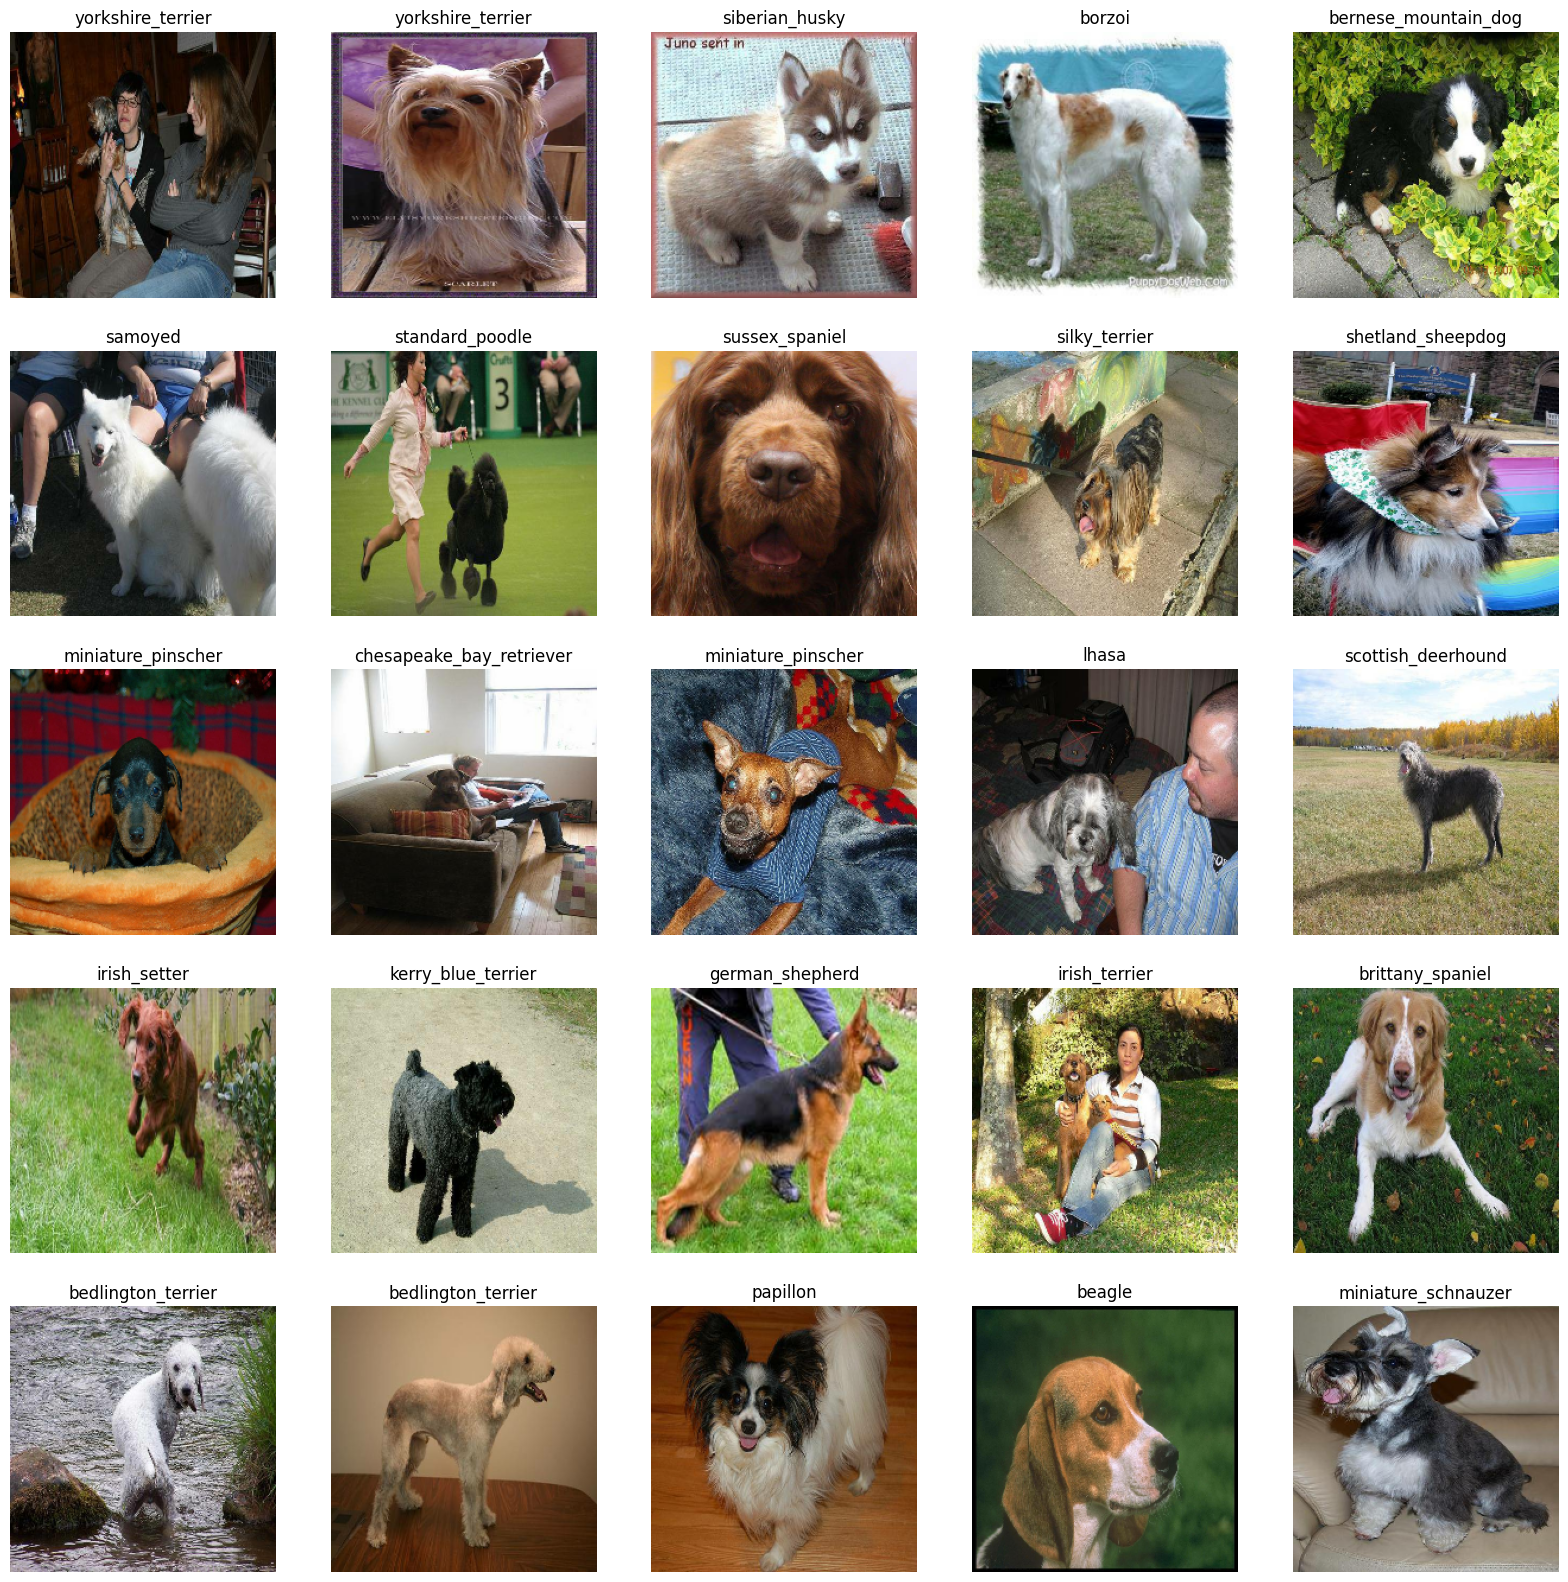

In [ ]:
# Visualizing training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [ ]:
#We are going to use transfer learning to do this because bulding a model from scratch needs lot of data(might be in millions) to develop and to train with millions of data takes lot of lot of time and cost .

# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Creating a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] # We'd like this to go up
  )

  # Building the model by giving an input shape
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


we are going to use 2 call backs
1. tensorBoard call back
2.EarlyStoppage call back

In [ ]:
#To load Tensorboard extension using magic function

%load_ext tensorboard

import datetime

# Creating  function to build a TensorBoard callback
def create_tensorboard_callback():
  #Creating a log directory for storing TensorBoard logs which is stored with thee info of date and time
  logdir = os.path.join("drive/My Drive/Data/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

  #TensorBoard_callback = tf.keras.callbacks.TensorBoard(logdir = os.path.join("/content/drive/MyDrive/Dog_breed/dog-breed-identification/logs", datetime.datetime.now().strftime("%d%m%Y-%H%M%S")))

In [ ]:
#Creating early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3) # stops after 3 rounds if there is no improvement in model

In [ ]:
#Traning our model
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
#Creating a function to train and return trained model by testing on validation data
def train_model():


  model = create_model()

  # Creating new TensorBoard session everytime we train a model
  #tensorboard = create_tensorboard_callback()

  # Fitting the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[create_tensorboard_callback(), early_stopping])
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 293s 12s/step - loss: 4.6953 - accuracy: 0.0763 - val_loss: 3.4667 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 71s 3s/step - loss: 1.6599 - accuracy: 0.6950 - val_loss: 2.1507 - val_accuracy: 0.4450
Epoch 3/100
25/25 [==============================] - 67s 3s/step - loss: 0.5620 - accuracy: 0.9425 - val_loss: 1.6692 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 68s 3s/step - loss: 0.2500 - accuracy: 0.9912 - val_loss: 1.4934 - val_accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 70s 3s/step - loss: 0.1432 - accuracy: 0.9975 - val_loss: 1.4056 - val_accuracy: 0.5950
Epoch 6/100
25/25 [==============================] - 69s 3s/step - loss: 0.0987 - accuracy: 1.0000 - val_loss: 1.3640 - val_accuracy: 0.6000
Epoch 7/100
25/25 [==============================] - 61s 2s

In [ ]:
#%tensorboard --logdir drive/My\ Drive/Data/logs
%tensorboard --logdir /content/drive/MyDrive/Data/logs

<IPython.core.display.Javascript object>

In [ ]:
predictions = model.predict(val_data)

7/7 [==============================] - 17s 2s/step


In [ ]:
predictions

array([[4.26720449e-04, 3.46042507e-05, 7.81266659e-04, ...,
        3.07569443e-03, 4.79721872e-04, 9.31076647e-04],
       [8.39729700e-03, 7.38744056e-05, 3.84055718e-04, ...,
        2.63939262e-03, 6.45374414e-04, 3.26650072e-04],
       [5.39309671e-03, 6.58249483e-05, 1.13610746e-04, ...,
        8.28302174e-04, 3.12121789e-04, 1.08087705e-04],
       ...,
       [2.15493550e-04, 1.06588367e-03, 3.07480944e-03, ...,
        1.71245039e-02, 1.80066454e-05, 2.45715113e-04],
       [1.96705759e-03, 6.11971045e-05, 3.69750414e-05, ...,
        1.98064474e-04, 7.73642896e-05, 3.91765637e-03],
       [2.64489645e-04, 4.57715039e-04, 4.01426187e-05, ...,
        6.37891644e-04, 2.12289029e-04, 1.64363548e-04]], dtype=float32)

In [ ]:
np.argmax(predictions[4])

53

In [ ]:
unique_breeds[53]

'greater_swiss_mountain_dog'

'greater_swiss_mountain_dog'